# Pythagorean Expectation and the Indian Premier League

The Indian Premier League (IPL) is the biggest cricket competition in the world, which has all of the world's best players in an eight week tournament involving eight teams playing sixty games in total. Each team plays every other team, once at home and then away, and the competition finishes with the four best teams competing in semi-finals and then a final.  

Cricket, like baseball, is a bat and ball game, where teams score runs and the team scoring the highest number of runs is the winner. There are, of course, many differences, but statistically speaking, we can generate the same Pythagorean statistic that we generated for baseball. Our data here is derived from the competition that took place in 2018.

The IPL is played in the T20 format, in which each team has up to 120 balls to score as many runs as they can (the game takes less than three hours to complete). One difference from baseball is that runs are much easier to score - in the IPL an average score is 170 runs - and outs (wickets) are much more costly - each team has only ten outs(called wickets) in the entire game, and if you run out of wickets before the 120 balls have been bowled (pitched) then your inning is over.

With this background, let's construct the Pythagorean Expectation for the IPL in 2018.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
IPL18 = pd.read_excel('IPL2018teams.xlsx')
print(IPL18.columns.tolist())

['scorecard_id', 'start_date', 'phase', 'name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'inn1team', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


In [21]:
IPL18["hwin"] = np.where(IPL18.home_team==IPL18.winning_team, 1, 0)
IPL18["awin"] = np.where(IPL18.away_team==IPL18.winning_team, 1, 0)
IPL18['htruns']= np.where(IPL18['home_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18['atruns']= np.where(IPL18['away_team']==IPL18['inn1team'],IPL18['innings1'],IPL18['innings2'])
IPL18["counter"]=1
IPL18[["winning_team", "hwin","awin","htruns", "atruns"]].head()

,winning_team,hwin,awin,htruns,atruns
0,Chennai Super Kings,0,1,165,169
1,Kings XI Punjab,1,0,167,166
2,Kolkata Knight Riders,1,0,177,176
3,Sunrisers,1,0,127,125
4,Chennai Super Kings,1,0,205,202


In [39]:
home_df = IPL18.groupby("home_team")["hwin","htruns", "atruns", "counter"].sum().reset_index()
home_df.rename(columns=dict(home_team="team", htruns="scoreH", atruns="concedeH", counter="gh"), inplace=True)
home_df

/tmp/ipykernel_361170/2319478509.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  home_df = IPL18.groupby("home_team")["hwin","htruns", "atruns", "counter"].sum().reset_index()


,team,hwin,scoreH,concedeH,gh
0,Chennai Super Kings,8,1577,1486,9
1,Delhi Daredevils,4,1258,1122,7
2,Kings XI Punjab,4,1188,1202,7
3,Kolkata Knight Riders,5,1468,1417,9
4,Mumbai Indians,3,1194,1171,7
5,Rajasthan Royals,5,1120,994,7
6,Royal Challengers Bangalore,4,1298,1286,7
7,Sunrisers,5,1070,1050,7


In [43]:
visitor_df = IPL18.groupby("away_team")["awin","htruns", "atruns", "counter"].sum().reset_index()
visitor_df.rename(columns=dict(away_team="team", htruns="concedeA", atruns="scoreA", counter="ga"), inplace=True)
visitor_df

/tmp/ipykernel_361170/2112120230.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  visitor_df = IPL18.groupby("away_team")["awin","htruns", "atruns", "counter"].sum().reset_index()


,team,awin,concedeA,scoreA,ga
0,Chennai Super Kings,3,1264,1232,7
1,Delhi Daredevils,1,1265,1085,7
2,Kings XI Punjab,2,1124,1022,7
3,Kolkata Knight Riders,4,1326,1291,7
4,Mumbai Indians,3,1111,1186,7
5,Rajasthan Royals,2,1362,1237,8
6,Royal Challengers Bangalore,2,1097,1024,7
7,Sunrisers,5,1624,1651,10


In [50]:
main_df = pd.merge(home_df, visitor_df, on="team")
main_df["total_scored"] = main_df["scoreH"] + main_df["scoreA"]
main_df["total_conceded"] = main_df["concedeH"] + main_df["concedeA"]
main_df["win_ratio"] = (main_df["hwin"] + main_df["awin"]) / (main_df["gh"] + main_df["ga"])
main_df["pyth_exp"] = main_df["total_scored"]**2 / (main_df["total_scored"]**2 + main_df["total_conceded"]**2)
main_df

,team,hwin,scoreH,concedeH,gh,awin,concedeA,scoreA,ga,total_scored,total_conceded,win_ratio,pyth_exp
0,Chennai Super Kings,8,1577,1486,9,3,1264,1232,7,2809,2750,0.687500,0.510612
1,Delhi Daredevils,4,1258,1122,7,1,1265,1085,7,2343,2387,0.357143,0.490698
2,Kings XI Punjab,4,1188,1202,7,2,1124,1022,7,2210,2326,0.428571,0.474444
3,Kolkata Knight Riders,5,1468,1417,9,4,1326,1291,7,2759,2743,0.562500,0.502908
4,Mumbai Indians,3,1194,1171,7,3,1111,1186,7,2380,2282,0.428571,0.521012
5,Rajasthan Royals,5,1120,994,7,2,1362,1237,8,2357,2356,0.466667,0.500212
6,Royal Challengers Bangalore,4,1298,1286,7,2,1097,1024,7,2322,2383,0.428571,0.487037
7,Sunrisers,5,1070,1050,7,5,1624,1651,10,2721,2674,0.588235,0.508711


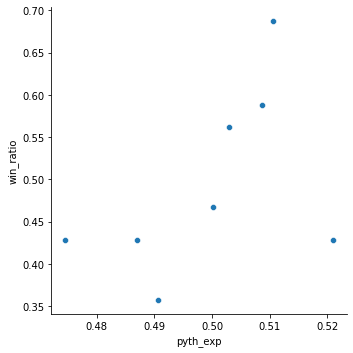

In [51]:
sns.relplot(x="pyth_exp", y="win_ratio", data=main_df)

In [52]:
pyth_lm = smf.ols(formula = 'win_ratio ~ pyth_exp', data=main_df).fit()
pyth_lm.summary()

/home/daniel/python_virtualenv/sports_analytics/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              win_ratio   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.830
Date:                Sun, 06 Mar 2022   Prob (F-statistic):              0.225
Time:                        13:57:45   Log-Likelihood:                 7.9710
No. Observations:                   8   AIC:                            -11.94
Df Residuals:                       6   BIC:                            -11.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2807      1.312     -0.976      0.367      -4.491       1.929
pyth_exp       3.5522      2.626      1.353      0.225      -2.872       9.977
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.217
Skew:                           0.014   Prob(JB):                        0.897
Kurtosis:                       2.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""